# Computational Methods for Astrophysics, Homework #6, Askold Vilkha, Taylor Paul, Clive Binu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython import display

For this homework, we are going to consider an inviscid Burger's equation:
$$\frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial (u^2)}{\partial x} = 0$$

## Exercise 1, Weak Solution 1

For this exercise, initial data is:
$$u(x, 0) = \begin{cases} 1 & \text{if } x < 0 \\ 0 & \text{if } x > 0 \end{cases}$$
We need to prove that weak solution is:
$$u(x, t) = \begin{cases} 1 & \text{if } x < \frac{1}{2} t \\ 0 & \text{if } x > \frac{1}{2} t \end{cases}$$

In order to do that, we will try to solve the Burger's equation using method of characteristics. Thus, we rewrite the equation as:
$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0\, ;\\
\partial_t u + u \partial_x u = 0$$
To obtain the parametrization invariant form, let's review the general form of the equation:
$$ a(x, t, u)\partial_x u + b(x, t, u)\partial_t u = c(x, t, u)$$
The invariant form is then:
$$ \frac{dx}{a(x, t, u)} = \frac{dt}{b(x, t, u)} = \frac{du}{c(x, t, u)}$$
In our case, we have:
$$ \frac{dx}{u} = \frac{dt}{1} = \frac{du}{0}$$
For this to be true, we need to have $du = 0$, which means that $u = C_1$. Thus, we are left with:
$$ \frac{dx}{u} = \frac{dt}{1} \implies \frac{dx}{dt} = u = C_1$$
This is a simple ODE, which can be solved as:
$$ x = C_1 t + C_2 \implies C_2 = x - C_1 t$$
If we try to express $u$ from this equation, we will get some function $u = F(C_2) = F(x - C_1 t)$. However, at $t = 0$, this simplifies to $u = F(x)$.
Indeed, our initial data is:
$$u(x, 0) = F(x) = \begin{cases} 1 & \text{if } x < 0 \\ 0 & \text{if } x > 0 \end{cases}$$

Therefore, the general solution will be of the form:
$$u(x, t) = F(x - C_1 t) = \begin{cases} 1 & \text{if } x - C_1 t < 0 \\ 0 & \text{if } x - C_1 t > 0 \end{cases}$$

In order to find $C_1$, we can utilize the following formula, which describes the curve of discontinuity $x = x(t)$ (reference: https://web.stanford.edu/class/math220a/handouts/conservation.pdf):
$$C_1 = \frac{dx}{dt} = \frac{f(u_L) - f(u_R)}{u_L - u_R}$$
where $u_L$ and $u_R$ are the left and right initial conditions (here $u_L = 1$ and $u_R = 0$), and $f = \frac{1}{2}u^2$. Thus, we get:
$$C_1 = \frac{\frac{1}{2}u_L^2 - \frac{1}{2}u_R^2}{u_L - u_R} = \frac{\frac{1}{2} - 0}{1 - 0} = \frac{1}{2}$$
Therefore:
$$u(x, t) = \begin{cases} 1 & \text{if } x - \frac{1}{2} t < 0 \\ 0 & \text{if } x - \frac{1}{2} t > 0 \end{cases} = 
\begin{cases} 1 & \text{if } x < \frac{1}{2} t \\ 0 & \text{if } x > \frac{1}{2} t \end{cases}$$
Now, we show that solution on the plot and animation below.

In [74]:
# initial data for the problem
x_array = np.linspace(-10, 10, 100)
t_array = np.linspace(0, 20, 100)
u_i = np.where(x_array < 0, 1, 0)

In [64]:
def image_generator(x_array: np.ndarray, t_array: np.ndarray, u_i: np.ndarray, solution_num: int, correct: bool = False):
    '''
    This function generates plots given the input data for the problem and the index of the solution.

    Parameters
    ----------
    x_array : np.ndarray
        Array of x values.
    t_array : np.ndarray
        Array of t values. The function will plot the evolution of the solution for each t value and index the resulting plots by the t value.
    u_i : np.ndarray
        Array of initial values for the solution.
    solution_num : int
        Index of the solution to be plotted. Can only be 1 or 2.
    correct : bool, optional
        If True, the function will mark the plots for correct solution.
    
    Returns
    -------
    None

    Raises
    ------
    ValueError
        If solution_num is not 1 or 2.
    '''
    if solution_num not in [1, 2]:
        raise ValueError('solution_num can only be 1 or 2')
    
    # this is a trick to avoid going through the if statement in the loop
    # u_l is the value of the solution when x < t/2
    # u_r is the value of the solution when x > t/2
    if solution_num == 1:
        u_l = 1
        u_r = 0
    else:
        u_l = 0
        u_r = 1
    
    sol_str = 'sol_'
    if correct:
        sol_str = sol_str + 'correct_'
    
    # generate plots
    fig, ax = plt.subplots()
    u = u_i
    for i in range(len(t_array)):
        ax.plot(x_array, u)
        ax.set_xlim(np.min(x_array), np.max(x_array))
        ax.set_xlabel('x'); ax.set_ylabel('u')
        ax.set_title(f'Weak solution {solution_num}, t = {t_array[i]:.2f}')
        plt.savefig(sol_str+f'{solution_num}_fig{i:03d}.png')
        ax.clear()
        u = np.where(x_array < (t_array[i]/2), u_l, u_r)
    plt.close()


In [5]:
image_generator(x_array, t_array, u_i, 1)

In [6]:
def video_generator(t_array: np.ndarray, solution_num: int, correct: bool = False):
    '''
    This function generates a video of the plots generated by image_generator.

    Parameters
    ----------
    t_array : np.ndarray
        Must be the same t_array used in image_generator. The function will look for the plots generated by image_generator which are indexed by the t values in t_array.
    solution_num : int
        Index of the solution plotted. Can only be 1 or 2.
    correct : bool, optional
        If True, the function will look for the plots generated by image_generator for the correct solution.
    
    Returns
    -------
    None

    Raises
    ------
    ValueError
        If solution_num is not 1 or 2.
    '''
    if solution_num not in [1, 2]:
        raise ValueError('solution_num can only be 1 or 2')
    
    sol_str = 'sol_'
    if correct:
        sol_str = sol_str + 'correct_'

    # initialize images
    images = []

    # read images
    for i in range(len(t_array)):
        images.append(imageio.imread(sol_str + f'{solution_num}_fig{i:03d}.png'))
    
    # generate video
    imageio.mimsave(sol_str + f'{solution_num}_video.mp4', images)

In [7]:
video_generator(t_array, 1)

/tmp/ipykernel_7207/4035304489.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(sol_str + f'{solution_num}_fig{i:03d}.png'))


In [8]:
display.Video("sol_1.mp4", width = 700, height = 500, embed = True)

## Exercise 2, Weak Solution 2

Here, we consider the following initial data:
$$u(x, 0) = \begin{cases} 0 & \text{if } x < 0 \\ 1 & \text{if } x > 0 \end{cases}$$
Similarly to the previous exercise, we need to prove that weak solution is:
$$u(x, t) = \begin{cases} 0 & \text{if } x < \frac{1}{2} t \\ 1 & \text{if } x > \frac{1}{2} t \end{cases}$$
Using the same logic as for the previous exercise, we can write the general solution as:
$$u(x, t) = F(x - C_1 t) = \begin{cases} 0 & \text{if } x - C_1 t < 0 \\ 1 & \text{if } x - C_1 t > 0 \end{cases}$$
We find $C_1$ in the same way as before:
$$C_1 = \frac{f(u_L) - f(u_R)}{u_L - u_R} =
\frac{\frac{1}{2}u_L^2 - \frac{1}{2}u_R^2}{u_L - u_R} = \frac{0 - \frac{1}{2}}{0 - 1} = \frac{1}{2}$$
Thus:
$$u(x, t) = \begin{cases} 0 & \text{if } x < \frac{1}{2} t \\ 1 & \text{if } x > \frac{1}{2} t \end{cases}$$
This solution is shown along with the animation below.

In [9]:
u_i = np.where(x_array < 0, 0, 1)
image_generator(x_array, t_array, u_i, 2)

In [10]:
video_generator(t_array, 2)

/tmp/ipykernel_7207/4035304489.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(sol_str + f'{solution_num}_fig{i:03d}.png'))


In [11]:
display.Video("sol_2_video.mp4", width = 700, height = 500, embed = True)

## Exercise 3, Correct Solution

For this part, we are trying to show that the solution 1 is correct and solution 2 is not. In order to do that, we consider the following initial data:
$$u(x, 0) = \begin{cases} u_L & \text{if } x < -h \\ u_R & \text{if } x > h \\ u_L + \frac{x + h}{2h}(u_R - u_L) & \text{if } -h < x < h \end{cases}$$
here $h$ is small. \
For a test, let's concentrate on the region $-h < x < h$ and decide $h = 0.1$. The results are shown in the animations below. 

In [66]:
# redefine the initial data for the problem
x_array_small = np.linspace(-.1, .1, 100)
t_array_small = np.linspace(0, .2, 100)
h = .1; u_l = 1; u_r = 0
u_i_corr = u_l + (u_r - u_l) * (x_array_small + h) / (2 * h)

In [67]:
image_generator(x_array_small, t_array_small, u_i_corr, 1, correct = True)

In [68]:
video_generator(t_array_small, 1, correct = True)

/tmp/ipykernel_7207/4035304489.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(sol_str + f'{solution_num}_fig{i:03d}.png'))


In [69]:
display.Video("sol_correct_1_video.mp4", width = 700, height = 500, embed = True)

In our interpretation, $u = 1$ represents the shock wave. Initially, the $u$ space was gradually increasing, but shock wave made it jump to $1$ by overflowing the $u$ space into that jump. Thus, we can imagine a shock wave of some gas particles moving forward in the matter. Now, let's review the solution 2.

In [70]:
h = .1; u_l = 0; u_r = 1
u_i_corr = u_l + (u_r - u_l) * (x_array_small + h) / (2 * h)

In [71]:
image_generator(x_array_small, t_array_small, u_i_corr, 2, correct = True)

In [72]:
video_generator(t_array_small, 2, correct = True)

/tmp/ipykernel_7207/4035304489.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(sol_str + f'{solution_num}_fig{i:03d}.png'))


In [73]:
display.Video("sol_correct_2_video.mp4", width = 700, height = 500, embed = True)

Indeed, the second animation does not appear to look like a shock propagation, rather it is in a reverse order. If we interpret $u = 1$ as a shock, then it should propagate to the right, while in the animation for the 2nd solution, the $u = 0$ region propagates to the right. Thus, it looks like particles from the shock dissapear to nowhere. This does not seem to be physically correct.

To explain why the solution 1 is correct, and solution 2 is not, we can use the following argument. Let's try to imagine how we can describe the trajectories of individual particles in the $x$-$t$ space. Our shock wave (front) representation here is the disconinuity line $x = \frac{1}{2}t$. Thus, we can show the behavior of particles inside and outside of the shock wave, or before and after the shock front on $x$ axis. For simplicity, we show the trajectories to the left side of the discontinuity as horizontal lines, so the movement happens instantly. In fact, it does not, but the plot below is not designed to be accurate, it is only supposed to help the understanding of the concept. Thus, we can plot the trajectories in Fig. 1.

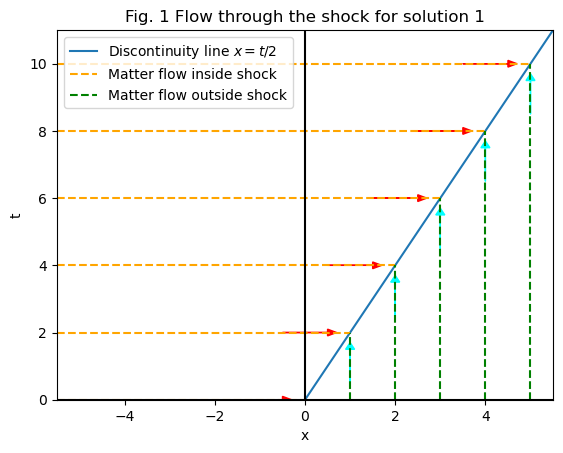

In [125]:
plt.plot(x_array, 2 * x_array, label = r'Discontinuity line $x = t/2$')
for i in range(5):
    plt.plot([-5.5, i], [2 * i, 2 * i], color = 'orange', linestyle = 'dashed')
    plt.arrow(i - 1.5, 2 * i, 1, 0, color = 'red', head_width = 0.2, head_length = 0.2) 
    plt.plot([i, i], [0, 2 * i], color = 'green', linestyle = 'dashed')
    plt.arrow(i, 2 * i - 1.5, 0, 1, color = 'cyan', head_width = 0.2, head_length = 0.2) 
plt.plot([-5.5, 5], [10, 10], color = 'orange', linestyle = 'dashed', label = r'Matter flow inside shock')
plt.arrow(5 - 1.5, 2 * 5, 1, 0, color = 'red', head_width = 0.2, head_length = 0.2) 
plt.plot([5, 5], [0, 10], color = 'green', linestyle = 'dashed', label = r'Matter flow outside shock')
plt.arrow(5, 10 - 1.5, 0, 1, color = 'cyan', head_width = 0.2, head_length = 0.2) 
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('x'); plt.ylabel('t')
plt.ylim(0, 11); plt.xlim(-5.5, 5.5)
plt.legend()
plt.title('Fig. 1 Flow through the shock for solution 1');

As we can see, all the trajectories end in the discontinuity at $x = \frac{1}{2} t$. This seems to be physically relevant, since the trajectory of the particle ends in the discontinuity. If we look at the similar plot for the solution 2, we will see a different picture. The trajectories are shown in Fig. 2.

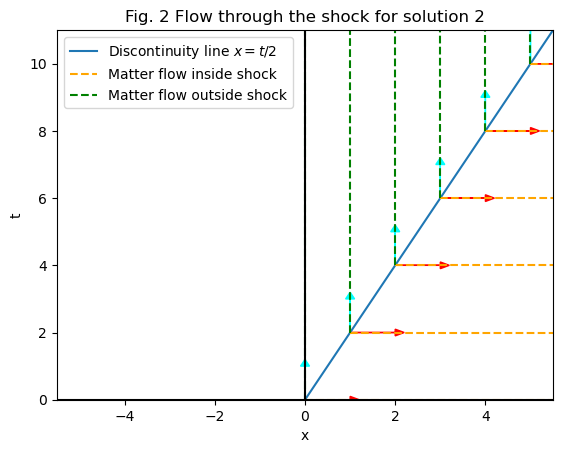

In [128]:
plt.plot(x_array, 2 * x_array, label = r'Discontinuity line $x = t/2$')
for i in range(5):
    plt.plot([i, 5.5], [2 * i, 2 * i], color = 'orange', linestyle = 'dashed')
    plt.arrow(i, 2 * i, 1, 0, color = 'red', head_width = 0.2, head_length = 0.2) 
    plt.plot([i, i], [2 * i, 11], color = 'green', linestyle = 'dashed')
    plt.arrow(i, 2 * i, 0, 1, color = 'cyan', head_width = 0.2, head_length = 0.2) 
plt.plot([5, 5.5], [10, 10], color = 'orange', linestyle = 'dashed', label = r'Matter flow inside shock')
plt.arrow(5, 2 * 5, 1, 0, color = 'red', head_width = 0.2, head_length = 0.2) 
plt.plot([5, 5], [10, 11], color = 'green', linestyle = 'dashed', label = r'Matter flow outside shock')
plt.arrow(5, 10, 0, 1, color = 'cyan', head_width = 0.2, head_length = 0.2) 
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.xlabel('x'); plt.ylabel('t')
plt.ylim(0, 11); plt.xlim(-5.5, 5.5)
plt.legend()
plt.title('Fig. 2 Flow through the shock for solution 2');

From the Fig. 2, it is clear that the trajectories start in the discontinuity, therefore, particles are generated in there. This is not physically reasonable, since particles cannot appear from nowhere, they should be generated somewhere. Thus, the solution 2 is not physically correct. In the solution 1, particles and related trajectories are generated outside of the discontinuity, which is physically possible, unlike this case.